In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from tqdm import tqdm
import acd
from copy import deepcopy
from model_GMM import init_specific_model
from losses_GMM import BetaLoss, BtcvaeLoss
from dset_GMM import get_dataloaders
from training import Trainer
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


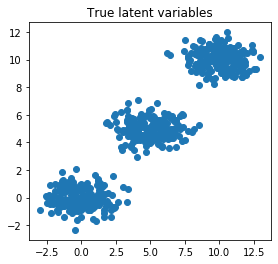

In [34]:
# GET DATALOADERS
train_loader, train_latents = get_dataloaders(n_samples_per_cluster=5000, 
                                              batch_size=64, 
                                              shuffle=False,
                                              return_latents=True)
test_loader, test_latents = get_dataloaders(n_samples_per_cluster=200, 
                                            batch_size=100, 
                                            shuffle=False,
                                            return_latents=True)

# PLOT LATENT VARIABLES
plot_2d_samples(test_latents)
plt.title('True latent variables')
plt.show()

In [217]:
# PREPARES MODEL
model = init_specific_model(orig_dim=10, latent_dim=4)
model = model.to(device)

# TRAINS
optimizer = torch.optim.Adam(model.parameters(), lr=5*1e-4)
beta = 0.000
loss_f = BetaLoss(beta=beta)

attr_lamb = 0.2
trainer = Trainer(model, optimizer, loss_f, device=device, attr_lamb=attr_lamb, use_residuals=True)
trainer(train_loader, test_loader, epochs=100)

# SAVE MODEL
save_dir = "results"
os.makedirs(save_dir, exist_ok=True)

name = "beta" + str(beta) + "_attr" + str(attr_lamb)
torch.save(model.state_dict(), opj(save_dir, name)) 

====> Epoch: 0 Average train loss: 75.9170 (Test set loss: 56.6207)
====> Epoch: 1 Average train loss: 14.8596 (Test set loss: 4.0609)
====> Epoch: 2 Average train loss: 4.7050 (Test set loss: 2.7828)
====> Epoch: 3 Average train loss: 2.8556 (Test set loss: 2.2599)
====> Epoch: 4 Average train loss: 2.2661 (Test set loss: 1.9964)
====> Epoch: 5 Average train loss: 1.9563 (Test set loss: 1.8025)
====> Epoch: 6 Average train loss: 1.7647 (Test set loss: 1.6718)
====> Epoch: 7 Average train loss: 1.6401 (Test set loss: 1.5874)
====> Epoch: 8 Average train loss: 1.5789 (Test set loss: 1.5485)
====> Epoch: 9 Average train loss: 1.5369 (Test set loss: 1.5219)
====> Epoch: 10 Average train loss: 1.5029 (Test set loss: 1.4886)
====> Epoch: 11 Average train loss: 1.4759 (Test set loss: 1.4653)
====> Epoch: 12 Average train loss: 1.4545 (Test set loss: 1.4414)
====> Epoch: 13 Average train loss: 1.4328 (Test set loss: 1.4209)
====> Epoch: 14 Average train loss: 1.4126 (Test set loss: 1.3900)
==

In [218]:
# trainer(train_loader, test_loader, epochs=50)

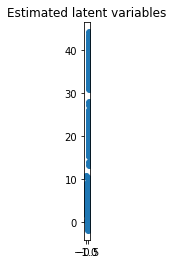

In [219]:
# EVALUATE TEST DATA
data = test_loader.dataset.data.to(device)
recon_data, latent_dist, latent_sample = model(data)

plot_2d_samples(latent_sample.detach().cpu())
plt.title('Estimated latent variables')
plt.show()

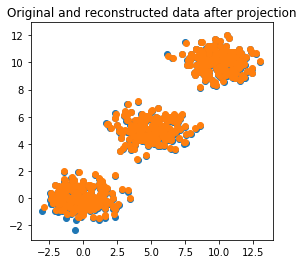

In [220]:
plot_2d_samples(data.detach().cpu()[:,:2])
plot_2d_samples(recon_data.detach().cpu()[:,:2])
plt.title('Original and reconstructed data after projection')
plt.show()

In [221]:
print('Pen: {:.8f}'.format(trainer._comp_latent_pen(latent_sample, latent_dist[0], latent_dist[1]).item()))

Pen: 0.13610917


###  PLOT TRAVERSALS

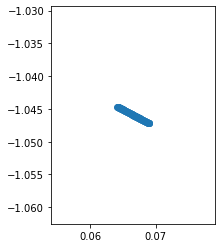

In [222]:
# GET TRAVERSAL
decoded_traversal = traversals(model, data=None, n_latents=4)

# PROJECTION to FIRST TWO COORDINATES
decoded_traversal0 = decoded_traversal[:,:2]
plot_2d_samples(decoded_traversal0[:100])

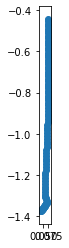

In [223]:
plot_2d_samples(decoded_traversal0[100:200])

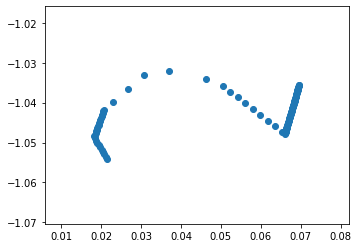

In [224]:
plot_2d_samples(decoded_traversal0[200:300])

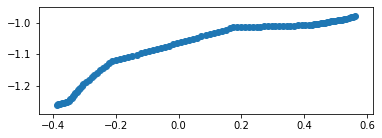

In [225]:
plot_2d_samples(decoded_traversal0[300:400])

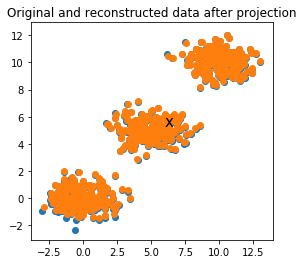

In [231]:
ind = 300
plot_2d_samples(data.detach().cpu()[:,:2])
plot_2d_samples(recon_data.detach().cpu()[:,:2])
plt.title('Original and reconstructed data after projection')
pt = data[ind:ind+1][:,:2]
plt.annotate("x", pt[0], size=15)
plt.show()

# GET TRAVERSAL
decoded_traversal = traversals(model, data=data[ind:ind+1], n_latents=4)
# PROJECTION to FIRST TWO COORDINATES
decoded_traversal0 = decoded_traversal[:,:2]

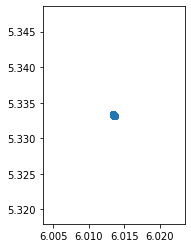

In [232]:
plot_2d_samples(decoded_traversal0[:100])

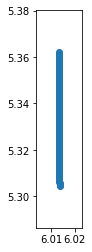

In [233]:
plot_2d_samples(decoded_traversal0[100:200])

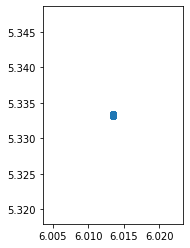

In [234]:
plot_2d_samples(decoded_traversal0[200:300])

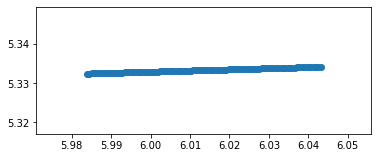

In [235]:
plot_2d_samples(decoded_traversal0[300:400])